<a href="https://colab.research.google.com/github/fasnfilho/An-lise_de_Cat-logo_da_Netflix/blob/main/An%C3%A1lise_de_Cat%C3%A1logo_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Este Projeto tem como intuito analisar os dados de um dataset da Netflix!

O dataset contém informações dos filmes e séries presentes no catálogo da netflix. Neste projeto, irei calcular quantidades, médias, desvios e fazer análises de dados com gráficos e tabelas, no intuito de estudar o dataset e como prática para aprender melhor sobre análise de dados e estudar a biblioteca pandas do Python!

#1. Importando as Bibliotecas

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#2. Importando o arquivo csv com os dados

In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
#Vendo os arquivos dentro da pasta
!ls "/content/drive/MyDrive/Estudo de Dados/"

#Importando o arquivo csv
dt_netflix = pd.read_csv("/content/drive/MyDrive/Estudo de Dados/netflix_titles.csv")

netflix_titles.csv


#3. Captando os dados base do dataset

In [133]:
#Analisando as informações das colunas do dataset
dt_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [134]:
#Analisando as 5 primeiras linhas do dataset
dt_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [135]:
#Dá informações sobre contagem de cada coluna, média etc.
dt_netflix.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


#4. Início da Análise dos dados

4.1. Cálculos de quantos filmes e séries têm no dataset

In [136]:
#Aqui podemos ver a coluna que iremos analisar
dt_netflix.loc[:,"type"]

,type
0,Movie
1,TV Show
2,TV Show
3,TV Show
4,TV Show
...,...
8802,Movie
8803,TV Show
8804,Movie
8805,Movie


In [137]:
#Aqui calculamos quanto de cada tipo tem no dataset
#No caso, só tínhamos 2 tipos, "Movie" e "TV Show"
dt_netflix["type"].value_counts()

,count
type,
Movie,6131
TV Show,2676


4.2. Cálculo de quais países têm mais produções

In [138]:
#Aqui podemos ver a coluna que iremos analisar
dt_netflix.loc[:,"country"]

,country
0,United States
1,South Africa
2,NaN
3,NaN
4,India
...,...
8802,United States
8803,NaN
8804,United States
8805,United States


In [139]:
#Aqui calculamos quantas produções cada país tem
#No caso, aqui pegamos todos os países que aparecem
dt_netflix["country"].value_counts()

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
...,...
"Mexico, United States, Spain, Colombia",1
"Canada, Norway",1
"Finland, Germany, Belgium",1


4.3. Cálculo do diretor com mais produções

In [140]:
#Aqui podemos ver a coluna que iremos analisar
dt_netflix.loc[:,"director"]

,director
0,Kirsten Johnson
1,NaN
2,Julien Leclercq
3,NaN
4,NaN
...,...
8802,David Fincher
8803,NaN
8804,Ruben Fleischer
8805,Peter Hewitt


In [141]:
#Aqui calculamos quantas produções cada diretor tem
#No caso, aqui pegamos todos os diretores que aparecem
dt_netflix["director"].value_counts()

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
...,...
James Brown,1
Ivona Juka,1
Mu Chu,1


In [142]:
#Aqui, criamos uma variável que será apenas o dataframe com a contagem de quantos filmes cada diretor fez.
#Como a função value_counts ordena os valores em ordem decrescente, a primeira linha terá o maior valor
diretor = dt_netflix["director"].value_counts()

#Aqui, printamos o diretor com maior valor de filmes dirigidos!
diretor.head(1)

,count
director,
Rajiv Chilaka,19


#5. Análises com gráficos

5.1. Filmes x Séries

In [143]:
#Aqui crio uma variável para armazenar a coluna de tipos
tipos = dt_netflix["type"].value_counts()

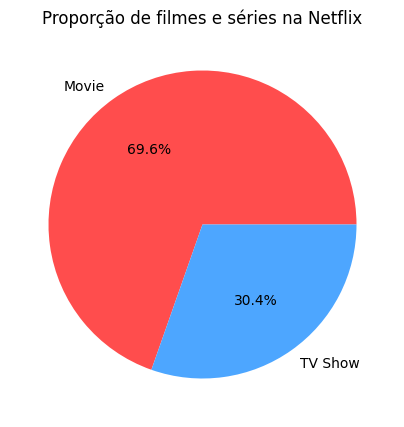

In [144]:
#Nesse bloco, gerei o gráfico de pizza para mostrar a distribuição percentual entre filmes e séries
plt.figure(figsize=(5, 5))
plt.pie(tipos, labels = tipos.index, autopct='%1.1f%%', colors=['#ff4d4d', '#4da6ff'])
plt.title("Proporção de filmes e séries na Netflix")
plt.show()

Aqui é possível perceber que o catálogo da Netflix tem uma quantidade bem maior de filmes do que de séries.

Aproximadamente 70% do catálogo é composto por filmes, o que demonstra que o foco do streaming é longa-metragens, mesmo tendo um sucesso recente com séries originais!

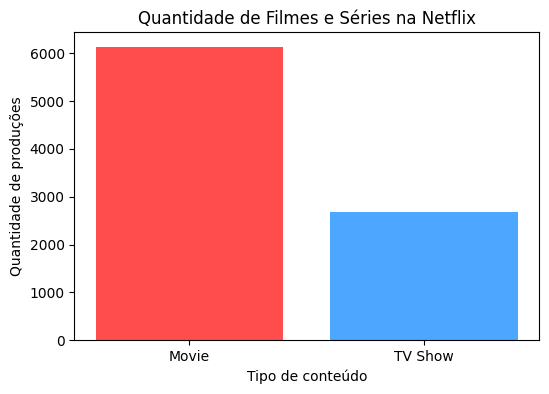

In [145]:
#Já nesse, gerei o gráfico de barras para mostrar os valores numéricos de cada tipo
plt.figure(figsize=(6,4))
plt.bar(tipos.index, tipos.values, color=["#ff4d4d", "#4da6ff"])
plt.title("Quantidade de Filmes e Séries na Netflix")
plt.xlabel("Tipo de conteúdo")
plt.ylabel("Quantidade de produções")
plt.show()

O gráfico de barras demonstra novamente o que foi visto no gráfico de pizza, onde a quantidade de séries é bem menor que a de filmes.

Mais uma coisa que podemos pontuar é a quantidade de produções presentes na Netflix. Mais de 6000 filmes e quase 3000 séries, mostrando o quanto a plataforma é recheada de conteúdo.

5.2. Países x Produções

In [146]:
#Aqui criei uma variável para armazenar a coluna de países
paises = dt_netflix["country"].value_counts()

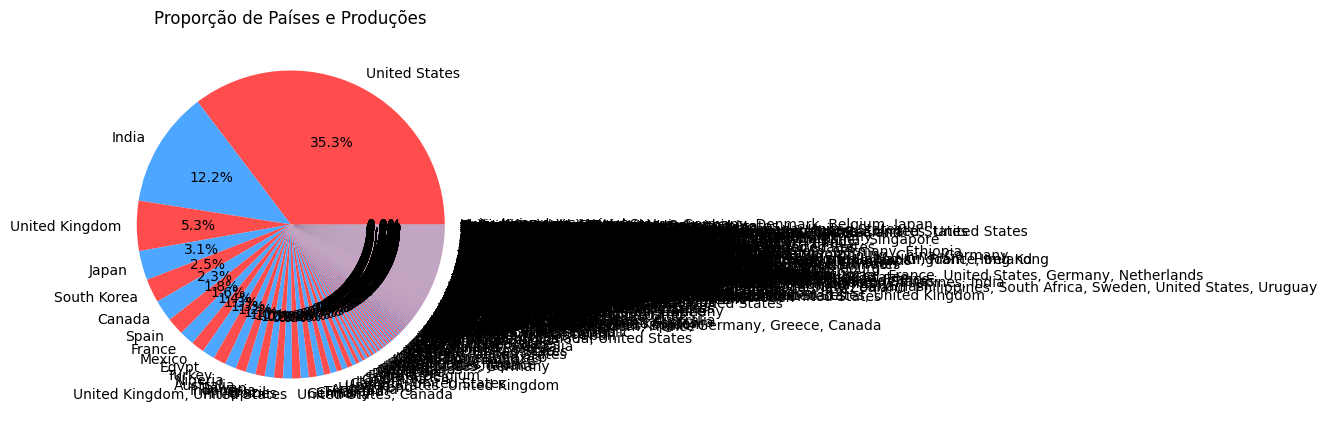

In [147]:
#Aqui plotei um gráfico de pizza para verificar a distribuição percentual de países por produção na Netflix
plt.figure(figsize=(5, 5))
plt.pie(paises, labels = paises.index, autopct='%1.1f%%', colors=['#ff4d4d', '#4da6ff'])
plt.title("Proporção de Países e Produções")
plt.show()

É possível notar que o gráfico ficou bem poluído, pois a quantidade de países com pelo menos uma produção é muito grande.

Então, como solução, vamos filtrar apenas os 5 maiores países produtores de filmes!

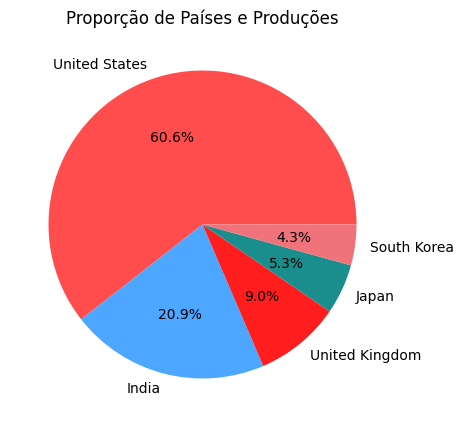

In [148]:
#Aqui criei uma nova variável, para armazenar apenas as 5 primeiras linhas da coluna de contagem
paises_reduzido = paises.head(5)

#Então plotei o gráfico de pizza com a nova variável
plt.figure(figsize=(5, 5))
plt.pie(paises_reduzido, labels = paises_reduzido.index, autopct='%1.1f%%', colors=['#ff4d4d', '#4da6ff', '#ff1d1d', '#1a8d8d', '#f0727b'])
plt.title("Proporção de Países e Produções")
plt.show()

A partir do gráfico de pizza, é possível ver a dominância americana na produção de filmes, mostrando a preferência da plataforma, que também é americana.

Fora isso, também é possível notar a presença da Índia como segundo país com mais produções. Isso pode ser verdade devido à alta produção de filmes de Bolywood, assim como os EUA tem Hollywood, gerando uma diferença considerável para os demais países!

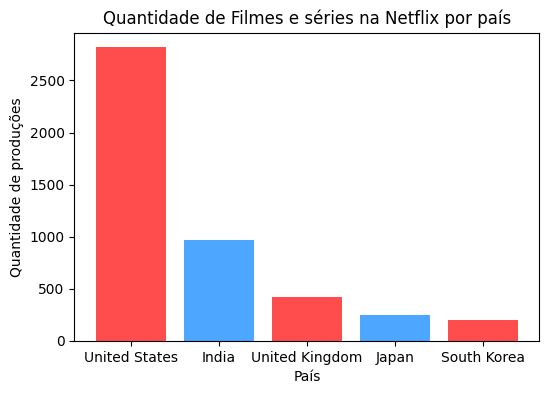

In [149]:
#Já nesse, gerei o gráfico de barras para mostrar os valores numéricos para os 5 primeiros países
plt.figure(figsize=(6,4))
plt.bar(paises_reduzido.index, paises_reduzido.values, color=["#ff4d4d", "#4da6ff"])
plt.title("Quantidade de Filmes e séries na Netflix por país")
plt.xlabel("País")
plt.ylabel("Quantidade de produções")
plt.show()

Com o gráfico de barras, é possível perceber ainda mais a discrepância entre os EUA e o resto, pois enquanto a Índia tem aproximadamente 1000 produções, os EUA tem mais de 2500!

5.3. Lançamentos por ano

In [150]:
#Mesmo procedimento da análise passada, por serem muitos países, reduzi a quantidade de anos analisados para os 10 com mais lançamentos
ano = dt_netflix["release_year"].value_counts()

ano_reduzido = ano.head(10)

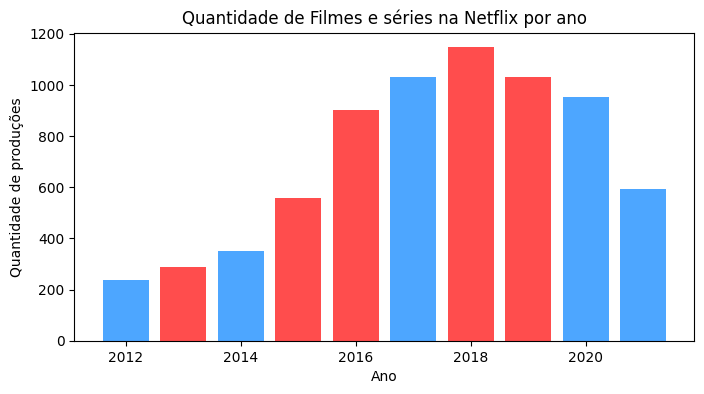

In [151]:
#Gerei o gráfico de barras para mostrar os valores numéricos para os 10 anos com mais produções
plt.figure(figsize=(8,4))
plt.bar(ano_reduzido.index, ano_reduzido.values, color=["#ff4d4d", "#4da6ff"])
plt.title("Quantidade de Filmes e séries na Netflix por ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade de produções")
plt.show()

Nesse caso, a análise não necessita do gráfico de pizza, apenas o de barras, pois é melhor de visualizar esse tipo de dado, devido ao fato de cada ano ser independente um do outro e não terem tanto contexto como era o caso dos países.

Nesse gráfico é possível perceber que 2018 é o ano com mais produções e, além disso, tem uma crescente de produções de 2012 até 2018 e, depois, uma queda, mostrando que esse período, por volta de 2018, é um período com a maior quantidade de produções feitas e marca um auge da Netflix em relação aos filmes em seu catálogo. Logo, podemos inferir que a Netflix e seu usuários têm uma preferência maior por filmes dessa época!

5.4. Duração média dos filmes

In [152]:
#Primeiro, criamos uma variável para armazenar duas colunas, a de tipos e a de duração, pois iremos analisar a duração apenas dos filmes
duracao = dt_netflix.iloc[: , [1, 9]]
duracao = duracao[duracao["type"] == "Movie"]

#Depois de deixarmos filtrarmos as colunas para mostrar apenas as durações dos filmes, agora, olhamos apenas para as durações em si
duracao = duracao["duration"]

#Então, fazemos a contagem de quantos filmes tem com cada minutagem de duração
duracao = duracao.value_counts()

print(duracao)

duration
90 min     152
97 min     146
94 min     146
93 min     146
91 min     144
          ... 
228 min      1
18 min       1
205 min      1
201 min      1
191 min      1
Name: count, Length: 205, dtype: int64


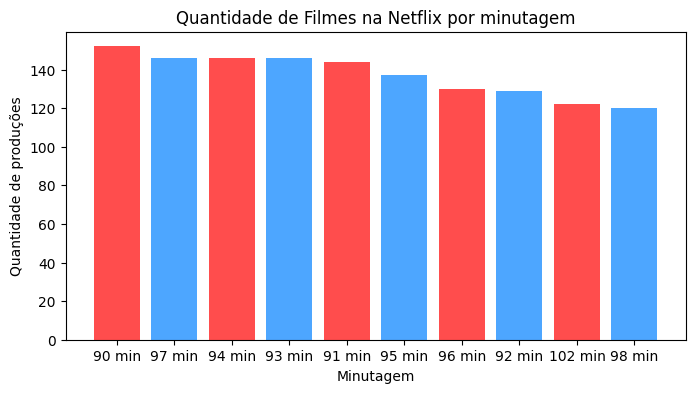

In [153]:
#Também reduzi a quantidade de linhas a serem usadas, pois são muitas e iria deformar nosso gráfico
duracao_reduzido = duracao.head(10)

#Gerei o gráfico de barras para mostrar os valores numéricos para as 10 minutagens com mais produções
plt.figure(figsize=(8,4))
plt.bar(duracao_reduzido.index, duracao_reduzido.values, color=["#ff4d4d", "#4da6ff"])
plt.title("Quantidade de Filmes na Netflix por minutagem")
plt.xlabel("Minutagem")
plt.ylabel("Quantidade de produções")
plt.show()

Nesse gráfico ficou bem claro que a grande maioria dos filmes está na faixa dos 90 até os 100 minutos, sendo essa faixa, aparentemente, a que os usuários sentem mais conforto e mais preferem assistir na Netflix!